Example Notebook
============

<h2>1. Run LDA the first time</h2>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda

In [2]:
fragment_filename = basedir + 'input/final/Beer_3_full1_5_2E5_pos_fragments.csv'
neutral_loss_filename = basedir + 'input/final/Beer_3_full1_5_2E5_pos_losses.csv'
mzdiff_filename = None
ms1_filename = basedir + 'input/final/Beer_3_full1_5_2E5_pos_ms1.csv'
ms2_filename = basedir + 'input/final/Beer_3_full1_5_2E5_pos_ms2.csv'
ms2lda = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                             ms1_filename, ms2_filename)

Data shape (1588, 3171)


In [3]:
### all the parameters you need to specify to run LDA ###

n_topics = 300 # 300 - 400 topics from cross-validation
n_samples = 10 # 100 is probably okay for testing. For manuscript, use > 500-1000.
n_burn = 0 # if 0 then we only use the last sample
n_thin = 5 # every n-th sample to use for averaging after burn-in
alpha = 50.0/n_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

ms2lda.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta)

Fitting model...
CGS LDA initialising
...............................................................................................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1 
Sample 2 
Sample 3 
Sample 4 
Sample 5   Log joint likelihood = -2501190.372 
Sample 6 
Sample 7 
Sample 8 
Sample 9 
Sample 10   Log joint likelihood = -2286510.270 
Using only the last sample
DONE. Time=28.9812459946


In [5]:
ms2lda.write_results('beer3_test_method3')
ms2lda.save_project('results/beer3pos.project')

Writing topics to results/beer3_test_method3/beer3_test_method3_topics.csv
Writing fragments x topics to results/beer3_test_method3/beer3_test_method3_all.csv
Writing topic docs to results/beer3_test_method3/beer3_test_method3_docs.csv
Project saved to results/beer3pos.project time taken = 21.3921849728


<h2>2. Resuming from Previous Run</h2>

If you did the save_project() above, you can resume from this step directly the next time you load the notebook ..

In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
ms2lda = Ms2Lda.resume_from('results/beer3pos.project')

Project loaded from results/beer3pos.project time taken = 17.3249840736
 - input_filenames = 
	../input/final/Beer_3_full1_5_2E5_pos_fragments.csv
	../input/final/Beer_3_full1_5_2E5_pos_losses.csv
	../input/final/Beer_3_full1_5_2E5_pos_ms1.csv
	../input/final/Beer_3_full1_5_2E5_pos_ms2.csv
 - df.shape = (1588, 3171)
 - K = 300
 - alpha = 0.166666666667
 - beta = 0.1
 - last_saved_timestamp = Thu Aug  6 16:13:04 2015


<h2>3. Results</h2>

We need to threshold the document-topic and topic-word distributions produced by LDA, so we can say which topics are used in which documents, and which words 'belongs' to a topic. 

In [38]:
# Fixed thresholding of 0.05 for the doc_topic and topic_word matrices
# NOTE: this is what we used before ..
# ms2lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.05)

# Doc_topic matrix is thresholded at 0.05
# Topic_word matrix is thresholded by the smallest value in each row
ms2lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.0)

# Both matrices are thresholded by the smallest value in each row 
# Seems a bit difficult to visualise the results effectively due to the high number of MS1 peaks per topic?
# ms2lda.do_thresholding(th_doc_topic=0.0, th_topic_word=0.0)

Print the words in each topic.

In [39]:
ms2lda.print_topic_words()

Topic 0: fragment_176.87617 (0.305917347625), fragment_119.04873 (0.236429857941), loss_54.01014 (0.0593820676499), fragment_122.09596 (0.0489223554781), loss_198.08902 (0.0415133942259), loss_172.07348 (0.0388133968084), loss_172.14606 (0.0321601214081), fragment_277.14277 (0.028253861985), loss_128.04741 (0.0191634903309), fragment_65.03879 (0.0184671116327), fragment_107.07296 (0.00659760220731), loss_89.02371 (0.00433852910507), fragment_94.06474 (0.00263996509046), fragment_93.06981 (0.000746030425971), fragment_131.07079 (0.000441813198047), fragment_178.08705 (0.000215881733312), fragment_105.07018 (0.000187056018242), fragment_117.03438 (0.000139928938187), fragment_249.14683 (0.000109593889439), fragment_71.04937 (0.000107591641751), fragment_160.07656 (0.000106827613139), fragment_439.12939 (9.83845875337e-05), fragment_79.05416 (9.70390707647e-05), fragment_93.0341 (9.65130467995e-05), fragment_157.10088 (8.77161530527e-05), loss_84.02104 (7.91035938739e-05), fragment_95.085

Save the output CSV files

In [40]:
ms2lda.write_results('beer3_test_method3')

Writing topics to results/beer3_test_method3/beer3_test_method3_topics.csv
Writing fragments x topics to results/beer3_test_method3/beer3_test_method3_all.csv
Writing topic docs to results/beer3_test_method3/beer3_test_method3_docs.csv


If the 'interactive' parameter below is True, we will show an interactive visualisation of the results in a separate tab. You need to interrupt the kernel to stop it once you're done with it (from the menu above, Kernel > Interrupt).

Ranking topics ...
 - topic 0 h-index = 6
 - topic 1 h-index = 2
 - topic 2 h-index = 2
 - topic 3 h-index = 10
 - topic 4 h-index = 7
 - topic 5 h-index = 7
 - topic 6 h-index = 5
 - topic 7 h-index = 5
 - topic 8 h-index = 3
 - topic 9 h-index = 3
 - topic 10 h-index = 2
 - topic 11 h-index = 4
 - topic 12 h-index = 5
 - topic 13 h-index = 3
 - topic 14 h-index = 7
 - topic 15 h-index = 2
 - topic 16 h-index = 4
 - topic 17 h-index = 3
 - topic 18 h-index = 5
 - topic 19 h-index = 3
 - topic 20 h-index = 4
 - topic 21 h-index = 3
 - topic 22 h-index = 2
 - topic 23 h-index = 3
 - topic 24 h-index = 5
 - topic 25 h-index = 2
 - topic 26 h-index = 2
 - topic 27 h-index = 4
 - topic 28 h-index = 3
 - topic 29 h-index = 3
 - topic 30 h-index = 1
 - topic 31 h-index = 4
 - topic 32 h-index = 5
 - topic 33 h-index = 3
 - topic 34 h-index = 2
 - topic 35 h-index = 2
 - topic 36 h-index = 4
 - topic 37 h-index = 4
 - topic 38 h-index = 7
 - topic 39 h-index = 8
 - topic 40 h-index = 3
 - top

127.0.0.1 - - [13/Aug/2015 18:57:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:22] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:22] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:22] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:22] "GET /images/default_logo.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:22] "GET /images/graph_example.jpg HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:24] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic245&action=load HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:25] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic245&action=set HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:26] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic245&action=load HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:26] "GET /images/default_logo.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2015 18:57:26] "GET /topic?circle_id=ldavis_el17662140008

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59486)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:57:41] "GE


Exception happened during processing of request from ('127.0.0.1', 59497)
----------------------------------------
----------------------------------------

127.0.0.1 - - [13/Aug/2015 18:57:46] "GET /topic?action=next&ts=1439488665753 HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:wri


Exception happened during processing of request from ('127.0.0.1', 59511)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:57:46] "GE


Exception happened during processing of request from ('127.0.0.1', 59512)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:57:46] "GE


Exception happened during processing of request from ('127.0.0.1', 59513)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:05] "GE


Exception happened during processing of request from ('127.0.0.1', 59530)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:05] "GE


Exception happened during processing of request from ('127.0.0.1', 59531)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:05] "GE


Exception happened during processing of request from ('127.0.0.1', 59532)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:06] "GE


Exception happened during processing of request from ('127.0.0.1', 59533)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:06] "GE


Exception happened during processing of request from ('127.0.0.1', 59534)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:06] "GE


Exception happened during processing of request from ('127.0.0.1', 59535)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:06] "GE


Exception happened during processing of request from ('127.0.0.1', 59536)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:06] "GE


Exception happened during processing of request from ('127.0.0.1', 59537)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:11] "GE


Exception happened during processing of request from ('127.0.0.1', 59546)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:11] "GE


Exception happened during processing of request from ('127.0.0.1', 59547)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:11] "GE


Exception happened during processing of request from ('127.0.0.1', 59548)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:11] "GE


Exception happened during processing of request from ('127.0.0.1', 59549)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:11] "GE


Exception happened during processing of request from ('127.0.0.1', 59550)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:12] "GE


Exception happened during processing of request from ('127.0.0.1', 59551)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:12] "GE


Exception happened during processing of request from ('127.0.0.1', 59552)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:12] "GE


Exception happened during processing of request from ('127.0.0.1', 59553)
----------------------------------------
----------------------------------------

127.0.0.1 - - [13/Aug/2015 18:58:12] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic296&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 59555)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:13] "GE


Exception happened during processing of request from ('127.0.0.1', 59556)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:13] "GE


Exception happened during processing of request from ('127.0.0.1', 59557)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:13] "GE


Exception happened during processing of request from ('127.0.0.1', 59558)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:14] "GE


Exception happened during processing of request from ('127.0.0.1', 59561)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:14] "GE


Exception happened during processing of request from ('127.0.0.1', 59562)
----------------------------------------
----------------------------------------

127.0.0.1 - - [13/Aug/2015 18:58:16] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic162&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 59572)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:17] "GE


Exception happened during processing of request from ('127.0.0.1', 59573)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:17] "GE


Exception happened during processing of request from ('127.0.0.1', 59574)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:18] "GE


Exception happened during processing of request from ('127.0.0.1', 59575)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:18] "GE


Exception happened during processing of request from ('127.0.0.1', 59576)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:18] "GE


Exception happened during processing of request from ('127.0.0.1', 59577)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:18] "GE


Exception happened during processing of request from ('127.0.0.1', 59578)
----------------------------------------
----------------------------------------

127.0.0.1 - - [13/Aug/2015 18:58:18] "GET /topic?circle_id=ldavis_el176621400086020831122511835945-topic272&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 59581)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:18] "GE


Exception happened during processing of request from ('127.0.0.1', 59582)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:19] "GE


Exception happened during processing of request from ('127.0.0.1', 59583)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:19] "GE


Exception happened during processing of request from ('127.0.0.1', 59584)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:19] "GE


Exception happened during processing of request from ('127.0.0.1', 59585)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:20] "GE


Exception happened during processing of request from ('127.0.0.1', 59588)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:20] "GE


Exception happened during processing of request from ('127.0.0.1', 59589)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:20] "GE


Exception happened during processing of request from ('127.0.0.1', 59590)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [13/Aug/2015 18:58:20] "GE


Exception happened during processing of request from ('127.0.0.1', 59591)
----------------------------------------

stopping Server...


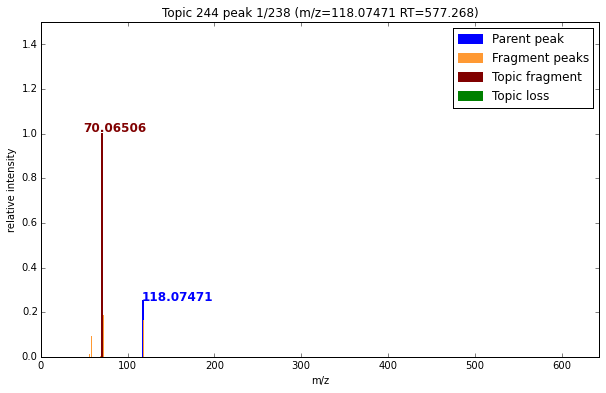

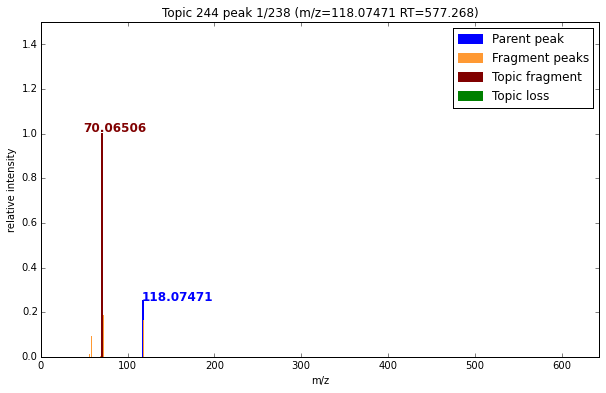

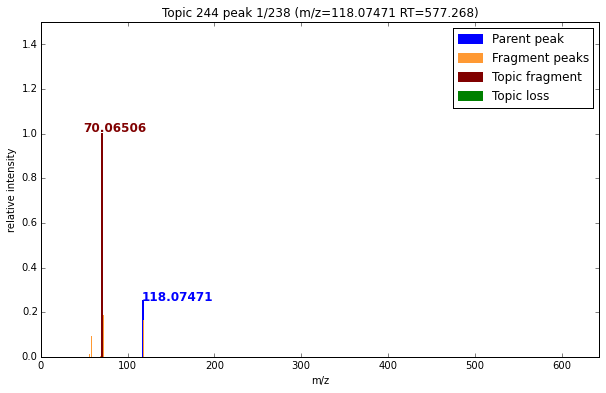

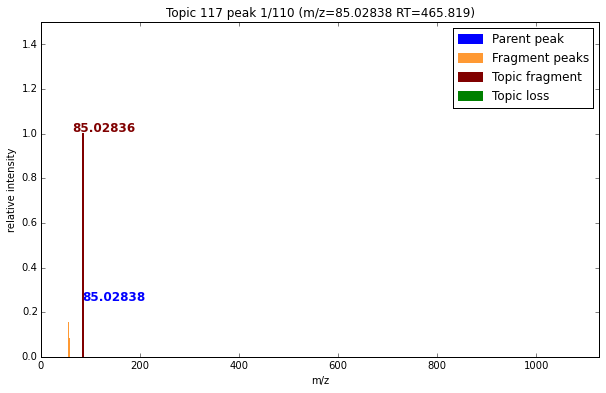

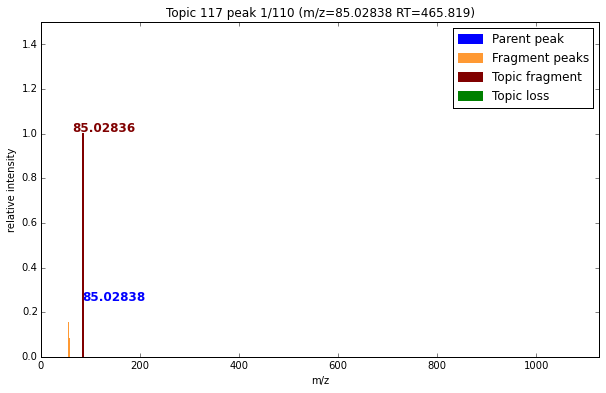

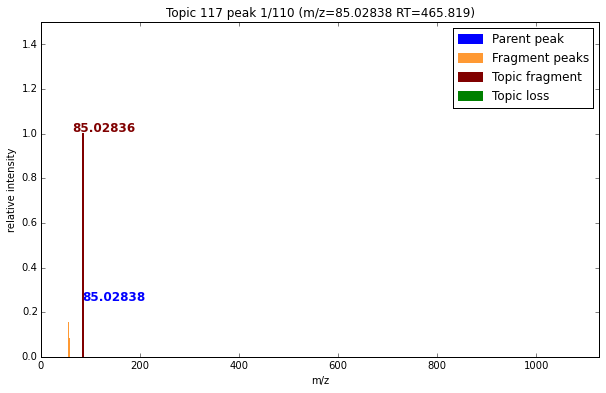

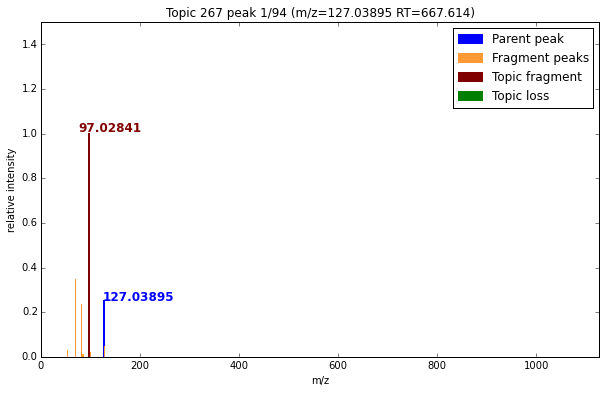

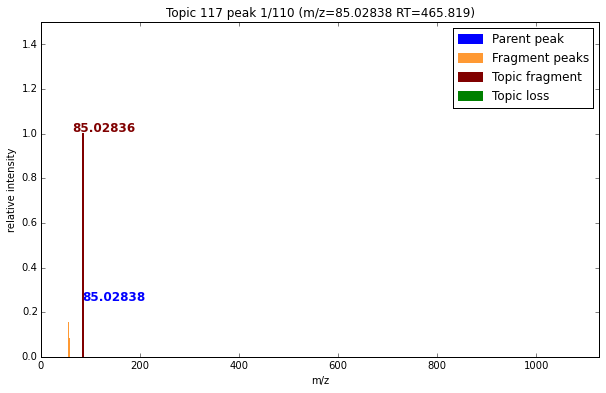

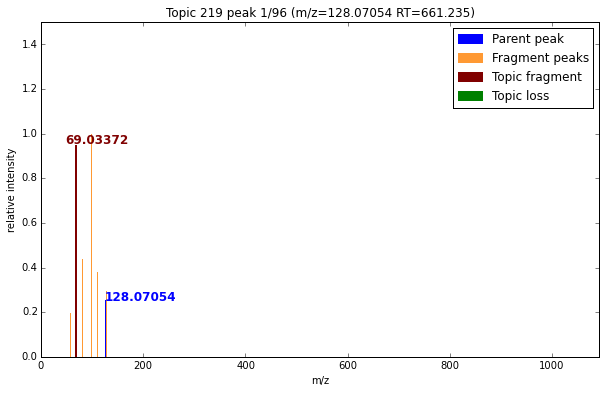

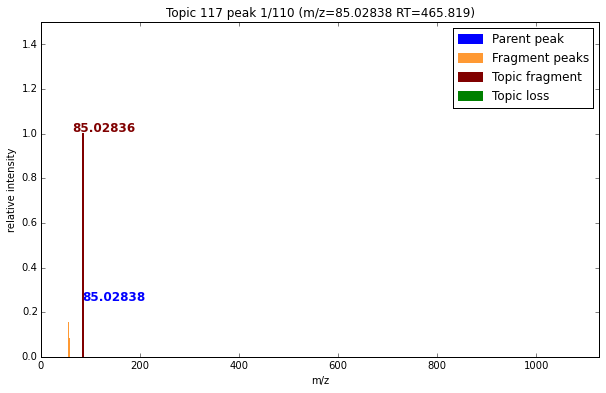

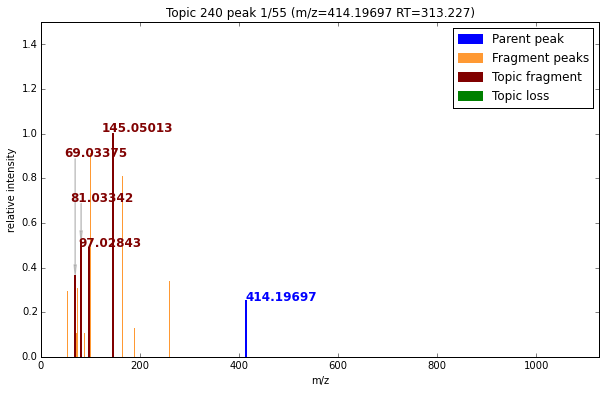

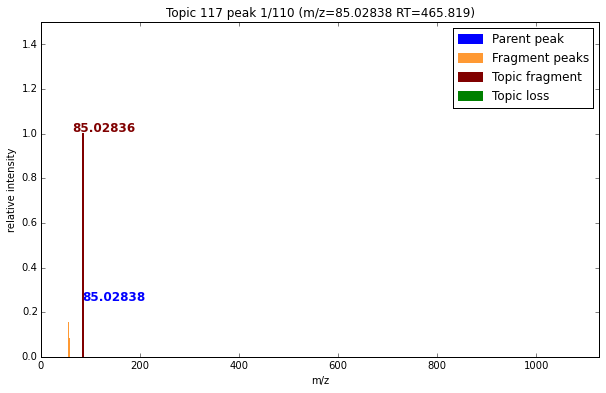

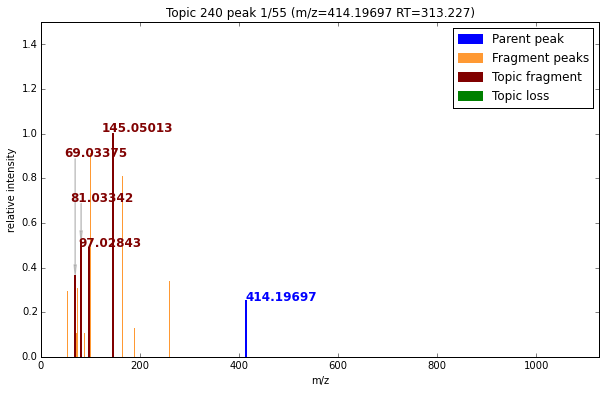

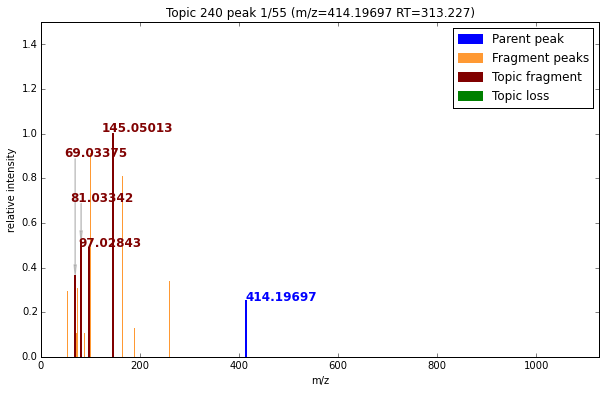

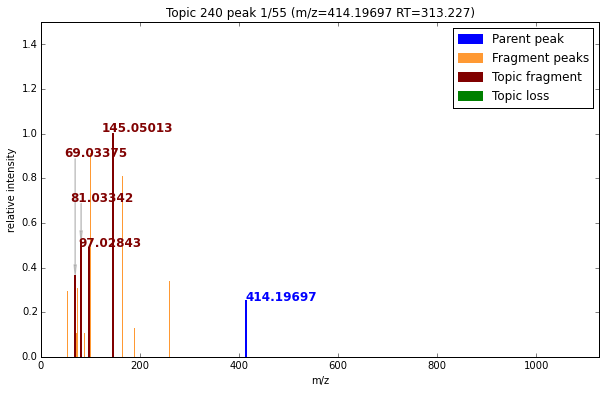

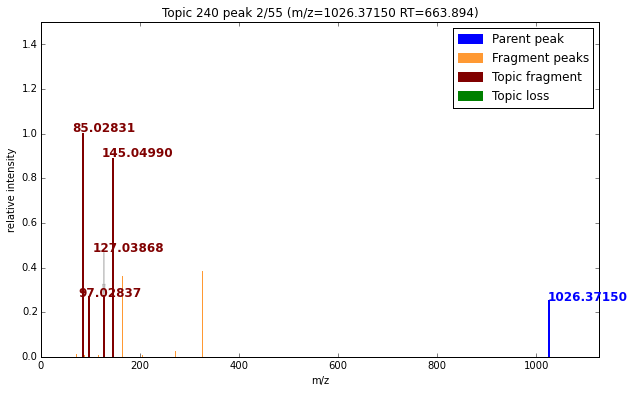

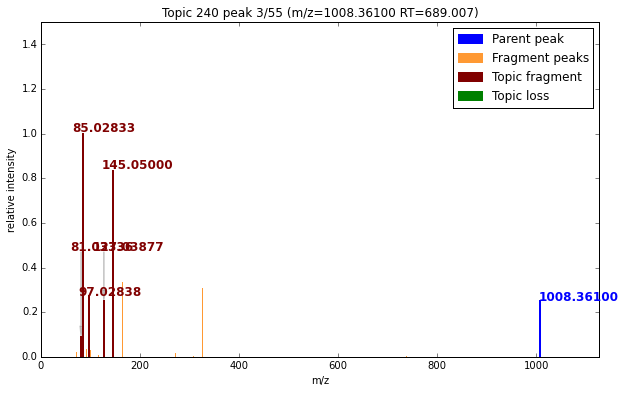

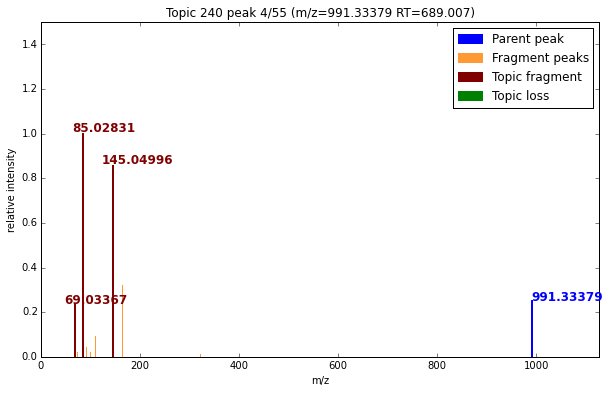

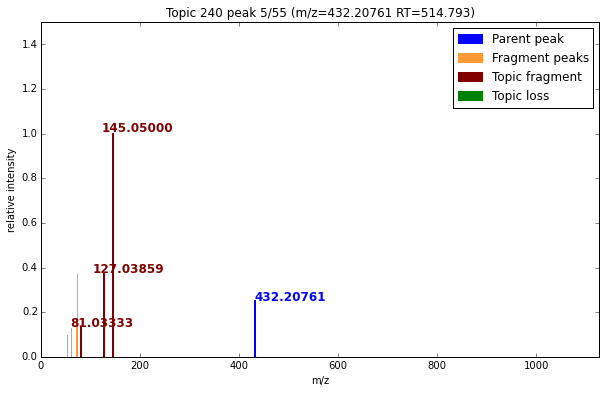

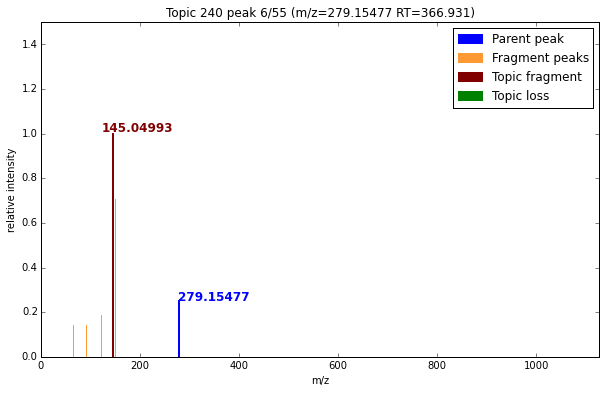

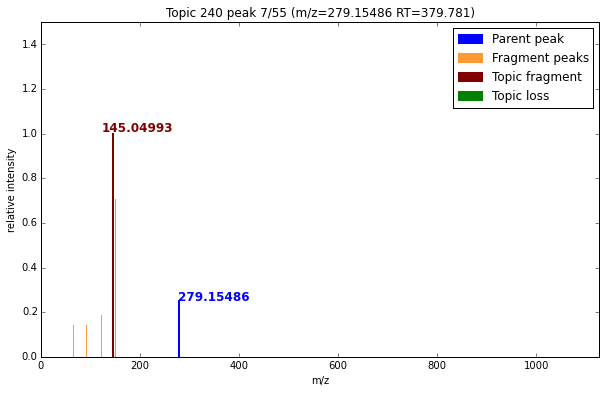

KeyboardInterrupt: 

In [40]:
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", interactive=True)
# ms2lda.plot_lda_fragments(consistency=0.50, sort_by="in_degree")